#Assignment 2

##2 PART A: Coffee Tasting Using Fractional Factorial Designs


In [ ]:
pip install dexpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dexpy: filename=dexpy-0.12-py3-none-any.whl size=30231 sha256=7ce6b1beb9a11b621974521daf7846f13fa2705ea2c4fc876cca4c7a40978b89
  Stored in directory: /root/.cache/pip/wheels/7a/1b/83/235bfd14a38f14faf06dfda90a000aa78de2e80f621ba5c895
Successfully built dexpy


In [ ]:
import dexpy . factorial
import pandas as pd
coffee_design = dexpy . factorial . build_factorial (5 , 2**(5 -1) )
coffee_design . columns = ["amount", "grind_size", "brew_time", "grind_type", "beans"]
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


###2.3 Adding Center Points to Estimate Curvature and Noise

In [ ]:
center_points = [[0 , 0, 0, -1, -1] ,
[0 , 0, 0 , -1, 1] ,
[0 , 0, 0 , 1 , -1] ,
[0 , 0, 0 , 1 , 1]]
center_points

[[0, 0, 0, -1, -1], [0, 0, 0, -1, 1], [0, 0, 0, 1, -1], [0, 0, 0, 1, 1]]

In [ ]:
import numpy as np
coffee_design = coffee_design . append ( pd . DataFrame ( center_points * 2, columns = coffee_design . columns ))
coffee_design . index = np . arange (0 , len( coffee_design ) )
coffee_design

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,-1,1
1,-1,-1,-1,1,-1
2,-1,-1,1,-1,-1
3,-1,-1,1,1,1
4,-1,1,-1,-1,-1
5,-1,1,-1,1,1
6,-1,1,1,-1,1
7,-1,1,1,1,-1
8,1,-1,-1,-1,-1
9,1,-1,-1,1,1


###2.4 Printing the Design: Coded as well as Using Actual Values

In [ ]:
actual_lows = { 'amount' : 2.5 , 'grind_size' : 8, 'brew_time': 3.5 ,
'grind_type': 'burr', 'beans': 'light' }
actual_highs = { 'amount' : 4 , 'grind_size' : 10 , 'brew_time': 4.5 ,
'grind_type': 'blade', 'beans': 'dark' }
actual_design = dexpy . design . coded_to_actual ( coffee_design , actual_lows , actual_highs )
actual_design

,amount,grind_size,brew_time,grind_type,beans
0,2.50,8.0,3.5,burr,dark
1,2.50,8.0,3.5,blade,light
2,2.50,8.0,4.5,burr,light
3,2.50,8.0,4.5,blade,dark
4,2.50,10.0,3.5,burr,light
5,2.50,10.0,3.5,blade,dark
6,2.50,10.0,4.5,burr,dark
7,2.50,10.0,4.5,blade,light
8,4.00,8.0,3.5,burr,light
9,4.00,8.0,3.5,blade,dark


###2.5 Task A1 - Determine and visualize design matrices

In [ ]:
coffee_design_small = dexpy . factorial . build_factorial (5 , 2**(5 -2) )
coffee_design_small . columns = ["amount", "grind_size", "brew_time", "grind_type", "beans"]
coffee_design_small

,amount,grind_size,brew_time,grind_type,beans
0,-1,-1,-1,1,1
1,-1,-1,1,1,-1
2,-1,1,-1,-1,1
3,-1,1,1,-1,-1
4,1,-1,-1,-1,-1
5,1,-1,1,-1,1
6,1,1,-1,1,-1
7,1,1,1,1,1


###2.6 Task A2 - Collect response values y(n) and add them to your dataset

In [ ]:
coffee_design ['taste_rating'] = [
4.4 , 2.6 , 2.4 , 8.6 , 1.6 , 2.8 , 7.2 , 3.4 ,
6.8 , 3.4 , 3.8 , 9.0 , 5.2 , 3.6 , 8.2 , 7.0 ,
5.4 , 6.8 , 3.6 , 5.4 , 4.8 , 6.2 , 4.4 , 5.8]
coffee_design

,amount,grind_size,brew_time,grind_type,beans,taste_rating
0,-1,-1,-1,-1,1,4.4
1,-1,-1,-1,1,-1,2.6
2,-1,-1,1,-1,-1,2.4
3,-1,-1,1,1,1,8.6
4,-1,1,-1,-1,-1,1.6
5,-1,1,-1,1,1,2.8
6,-1,1,1,-1,1,7.2
7,-1,1,1,1,-1,3.4
8,1,-1,-1,-1,-1,6.8
9,1,-1,-1,1,1,3.4


###2.7 Task A3 - Fit coefficients in a plain linear regression model using OLS

In [ ]:
coffee_design_as_np_array = coffee_design . to_numpy () # Convert from pandas to numpy array
y_np_array = coffee_design_as_np_array [: ,5]
y_np_array = y_np_array . reshape ( -1 ,1) # Reshape to column 2D numpy array
X_np_array = coffee_design_as_np_array [: ,0:5] # Examples as rows

# LEAST SQUARES CLOSED FORM SOLUTION w= inv (Z ’*Z)*Z ’*y
# Extend X_np_array with one extra column for the intercept
shapeX = X_np_array . shape
nrows = shapeX [0]
Z = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x_0 = 1 to each instance (row)
# to include an intercept term w_0 in the model
# Calculate w= inv (Z ’*Z ’)*Z ’*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y_np_array )) # column vector
print ( w_np_array )


[[ 5.1       ]
 [ 0.875     ]
 [-0.125     ]
 [ 1.2       ]
 [-0.13333333]
 [ 0.45      ]]


###2.8 Task A4 - Interpretation of the fitted coefficients

i) The biggest coefficient is for x3 (brew_time), which would mean that it is the most influential

ii) The magnitudes of the estimated coefficients directly comparable when using the coded values {−1, 0, +1} because we can see them as normalized (that they are on the same scale). In the case that the real values are used some variables min is 2 and max 4, while another is 8 and 10. Because of this you probably can't compare the coefficients directly.

###2.9 Task A5 - Refined analysis using interaction terms

In [ ]:
coffee_design_as_np_array = coffee_design . to_numpy () # Convert from pandas to numpy array
y_np_array = coffee_design_as_np_array [: ,5]
y_np_array = y_np_array . reshape ( -1 ,1) # Reshape to column 2D numpy array
X_np_array = coffee_design_as_np_array [: ,0:5] # Examples as rows

# LEAST SQUARES CLOSED FORM SOLUTION w= inv (Z ’*Z)*Z ’*y
# Extend X_np_array with one extra column for the intercept
shapeX = X_np_array . shape
nrows = shapeX [0]
Z = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x_0 = 1 to each instance (row)
# Add interaction terms
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,1]]
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,2]]
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,3]]
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,4]]
Z = np . c_ [ Z , X_np_array [: ,1]* X_np_array [: ,2]]
Z = np . c_ [ Z , X_np_array [: ,1]* X_np_array [: ,3]]
Z = np . c_ [ Z , X_np_array [: ,1]* X_np_array [: ,4]]
Z = np . c_ [ Z , X_np_array [: ,2]* X_np_array [: ,3]]
Z = np . c_ [ Z , X_np_array [: ,2]* X_np_array [: ,4]]
Z = np . c_ [ Z , X_np_array [: ,3]* X_np_array [: ,4]]

# to include an intercept term w_0 in the model
# Calculate w= inv (Z ’*Z ’)*Z ’*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y_np_array )) # column vector
print ( w_np_array )

[[ 5.1       ]
 [ 0.875     ]
 [-0.125     ]
 [ 1.2       ]
 [-0.13333333]
 [ 0.45      ]
 [ 0.25      ]
 [-0.075     ]
 [-0.175     ]
 [-1.325     ]
 [ 0.375     ]
 [-0.725     ]
 [ 0.375     ]
 [ 0.75      ]
 [ 0.15      ]
 [ 0.08333333]]


i) The greatest coefficient has value -1.325, which means that its variable is the most influential. This corresponds to x0*x4, which is amount and beans. Yes, there are some variable coefficients where the corresponding interaction weight has switched sign. For example, w1 = + w1w2

ii) The inclusion of interaction terms implies that the change of interaction terms are context dependent. Say that w1 is positive and x0 increases the net effect could still decrease if an interaction term, say x1, was negative.

##3 PART B: D-Optimal Experimental Design

###3.1 A First Example - Chemical Process Analysis

####3.1.3 Creating a D-Optimal Design in Python

In [ ]:
import dexpy . optimal
from dexpy . model import ModelOrder

#D- optimal design of quadratic model
no_of_factors =2
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =6 , order = ModelOrder . quadratic,  )

# Print out of the design and conversion to real experimental values to use in the actual experiments to be performed
column_names = ['time', 'temp']
actual_lows = {'time': 40 , 'temp': 80 }
actual_highs = {'time': 50 , 'temp': 90 }
reaction_design . columns = column_names
print ( dexpy . design . coded_to_actual ( reaction_design , actual_lows , actual_highs ) )

        time       temp
0  40.000000  90.000000
1  50.000000  86.363636
2  47.272727  90.000000
3  50.000000  80.000000
4  40.000000  80.000000
5  44.545455  84.545455


Question: why do we get different values between runs?

####3.1.4 Graphical visualization of the D-Optimal Design in Python

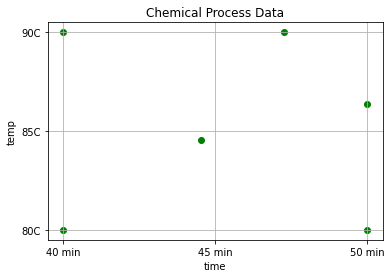

In [ ]:
import matplotlib as plt
reaction_design_np_array = reaction_design . to_numpy ()
fig = plt . pyplot . figure ()
ax = fig . add_subplot ()

# plotting the points
plt . pyplot . scatter ( reaction_design_np_array [: ,0] , reaction_design_np_array [: ,1] , color ='green', marker='o')
plt . pyplot . xlabel ('time')
plt . pyplot . ylabel ('temp')
ax . set_xticks ([ -1 , 0, 1])
ax . set_xticklabels (['40 min', '45 min', '50 min'])
ax . set_yticks ([ -1 , 0, 1])
ax . set_yticklabels (['80C', '85C', '90C'])
ax . grid ()
plt . pyplot . title ('Chemical Process Data')
plt . pyplot . show ()

####3.1.5 Task B1 - D-optimality is about maximizing |ZTZ|

In [ ]:
import numpy as np
X_np_array = reaction_design_np_array

# Add columns corresponding to a full quadratic model to the design matrix Z_np_array
shapeX = X_np_array . shape
nrows = shapeX [0]
Z_np_array = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x0 = 1 to each instance (row )
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,0]* X_np_array [: ,0]]
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,1]* X_np_array [: ,1]]
Z_np_array = np . c_ [ Z_np_array , X_np_array [: ,0]* X_np_array [: ,1]]
Z_np_array
det_Z_np_array = np . linalg . det ( np . matmul ( np . transpose ( Z_np_array ) , Z_np_array ))
det_Z_np_array
print ("|(Z’Z)| for optimal design :", det_Z_np_array )


|(Z’Z)| for optimal design : 264.567124771258


iv)


        time       temp
0  44.545455  80.000000
1  50.000000  80.000000
2  50.000000  90.000000
3  50.000000  90.000000
4  40.000000  80.000000
5  50.000000  84.545455
6  40.000000  90.000000
7  40.000000  84.545455
8  44.545455  90.000000
9  45.133990  85.454545


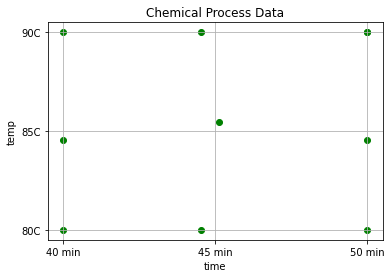

In [ ]:
#D- optimal design of quadratic model
no_of_factors =2
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =10 , order = ModelOrder . quadratic,  )

# Print out of the design and conversion to real experimental values to use in the actual experiments to be performed
column_names = ['time', 'temp']
actual_lows = {'time': 40 , 'temp': 80 }
actual_highs = {'time': 50 , 'temp': 90 }
reaction_design . columns = column_names
print ( dexpy . design . coded_to_actual ( reaction_design , actual_lows , actual_highs ) )

reaction_design_np_array = reaction_design . to_numpy ()
fig = plt . pyplot . figure ()
ax = fig . add_subplot ()

# plotting the points
plt . pyplot . scatter ( reaction_design_np_array [: ,0] , reaction_design_np_array [: ,1] , color ='green', marker='o')
plt . pyplot . xlabel ('time')
plt . pyplot . ylabel ('temp')
ax . set_xticks ([ -1 , 0, 1])
ax . set_xticklabels (['40 min', '45 min', '50 min'])
ax . set_yticks ([ -1 , 0, 1])
ax . set_yticklabels (['80C', '85C', '90C'])
ax . grid ()
plt . pyplot . title ('Chemical Process Data')
plt . pyplot . show ()

###3.2 A Second Example - Paper Helicopter Design

####3.2.1 Task B2 - OLS fitting of Paper Helicopter Data

In [ ]:
import numpy as np
X =[[ -1 , -1] ,[1 , -1] ,[ -1 ,1] ,[1 ,1] ,[0 ,0] ,[0 ,0] ,[0 ,0] ,[1 ,0] ,[ -1 ,0] ,[0 ,1] ,[0 , -1]]
y =[13.65 ,13.74 ,15.48 ,13.53 ,17.38 ,16.35 ,16.41 ,12.51 ,15.17 ,14.86 ,11.85]
X= np . asarray (X)
y= np . asarray (y). reshape ( -1 ,1)
print (X)
print (y)

[[-1 -1]
 [ 1 -1]
 [-1  1]
 [ 1  1]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 1  0]
 [-1  0]
 [ 0  1]
 [ 0 -1]]
[[13.65]
 [13.74]
 [15.48]
 [13.53]
 [17.38]
 [16.35]
 [16.41]
 [12.51]
 [15.17]
 [14.86]
 [11.85]]


In [ ]:
#y_np_array = coffee_design_as_np_array [: ,5]
#y_np_array = y_np_array . reshape ( -1 ,1) # Reshape to column 2D numpy array
X_np_array = X [: ,0:2] # Examples as rows

# LEAST SQUARES CLOSED FORM SOLUTION w= inv (Z ’*Z)*Z ’*y
# Extend X_np_array with one extra column for the intercept
shapeX = X_np_array . shape
nrows = shapeX [0]
Z = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x_0 = 1 to each instance (row)
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,1]]
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,0]]
Z = np . c_ [ Z , X_np_array [: ,1]* X_np_array [: ,1]]
# to include an intercept term w_0 in the model
# Calculate w= inv (Z ’*Z ’)*Z ’*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
w_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y )) # column vector
print ( w_np_array )

[[15.95157895]
 [-0.75333333]
 [ 0.77166667]
 [-0.51      ]
 [-0.96894737]
 [-1.45394737]]


####3.2.2 Task B3 - Fit Simulated Paper Helicopter Data Using a D-Optimal Design


1.

In [ ]:
import dexpy . optimal
from dexpy . model import ModelOrder

#D- optimal design of quadratic model
no_of_factors =2
reaction_design = dexpy . optimal . build_optimal ( no_of_factors , run_count =6 , order = ModelOrder . quadratic,  )

# Print out of the design and conversion to real experimental values to use in the actual experiments to be performed
column_names = ['x1', 'x2']
actual_lows = {'x1': -1 , 'x2': -1 }
actual_highs = {'x1': 1 , 'x2': 1 }
reaction_design . columns = column_names
print ( dexpy . design . coded_to_actual ( reaction_design , actual_lows , actual_highs ) )

         x1        x2
0  1.000000  1.000000
1  1.000000 -1.000000
2  0.090909 -0.090909
3 -1.000000 -1.000000
4 -0.272727  1.000000
5 -1.000000  0.454545


2.

In [ ]:
w0 = w_np_array[0][0]
w1 = w_np_array[1][0]
w2 = w_np_array[2][0]
w12 = w_np_array[3][0]
w11 = w_np_array[4][0]
w22 = w_np_array[5][0]

N = 6

y=np.zeros(N)

for i in range (N):
  x1=reaction_design['x1'][i]
  x2=reaction_design['x2'][i]
  e = np.random.normal(0,0.1)
  y[i] = w0+w1*x1+w2*x2+w12*x1*x2+w11*x1**2+w2*x2**2 + e
y

array([15.3411943 , 14.77556748, 16.06553396, 15.25501221, 17.78879596,
       16.55119375])

3.

In [ ]:
X = [[1,1],[-0.454545,1],[-1.0,272727],[1,-1],[0.090909,-0.090909],[-1,-1]]
y =[15.26275562, 17.85314791, 16.13931783, 14.74955713, 15.67891067,15.3016867 ]
X= np . asarray (X)
y= np . asarray (y). reshape ( -1 ,1)
print (X)
print (y)

[[ 1.00000e+00  1.00000e+00]
 [-4.54545e-01  1.00000e+00]
 [-1.00000e+00  2.72727e+05]
 [ 1.00000e+00 -1.00000e+00]
 [ 9.09090e-02 -9.09090e-02]
 [-1.00000e+00 -1.00000e+00]]
[[15.26275562]
 [17.85314791]
 [16.13931783]
 [14.74955713]
 [15.67891067]
 [15.3016867 ]]


In [ ]:
X_np_array = X [: ,0:2] # Examples as rows

# LEAST SQUARES CLOSED FORM SOLUTION w= inv (Z ’*Z)*Z ’*y
# Extend X_np_array with one extra column for the intercept
shapeX = X_np_array . shape
nrows = shapeX [0]
Z = np . c_ [ np . ones (( nrows , 1) ) , X_np_array ] # add x_0 = 1 to each instance (row)
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,1]]
Z = np . c_ [ Z , X_np_array [: ,0]* X_np_array [: ,0]]
Z = np . c_ [ Z , X_np_array [: ,1]* X_np_array [: ,1]]
# to include an intercept term w_0 in the model
# Calculate w= inv (Z ’*Z ’)*Z ’*y using np. transpose () and np. matmul () and np. linalg . inv ()
Ztranspose = np . transpose ( Z)
ZtransposeZ = np . matmul ( Ztranspose ,Z)
ZtransposeZ_inv = np . linalg . inv ( ZtransposeZ )
v_np_array = np . matmul ( ZtransposeZ_inv , np . matmul ( Ztranspose , y )) # column vector
print ( v_np_array )

[[ 1.58666071e+01]
 [-1.09165861e+00]
 [ 1.07192366e+00]
 [-8.15329758e-01]
 [ 2.30639320e-01]
 [-6.91995023e-06]]


4.

In [ ]:
array_diff =[]

for i in range (len(v_np_array)):
  diff = abs(v_np_array[i][0] - w_np_array[i][0])
  array_diff.append(diff)

array_diff

[0.0849718457342803,
 0.33832527379194843,
 0.3002569915850962,
 0.3053297584503887,
 1.1995866882879476,
 1.4539404484708207]